# Coursera Capstone
### This notebook will be used for the applied data science capstone.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [3]:
print("Hello Capstone Project Course")

Hello Capstone Project Course


#### New drivers are frequently involved in accidents due to their inexperience. Predicting the severity and type of accidents based on weather and road conditions.

#### The results of this project will enable driving instructors to adjust their training lessons to better prepare new drivers to deal with these challenges from the start. By training new drivers how to effectively deal with these situations at the beginning of their driving career, the frequency of these types of accidents will decrease preventing injuries and property damage.


In [4]:
# Download data set  
df_collisions=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [5]:
df_collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
# Find out how many entries there are in the dataset
print(df_collisions.shape)
df_collisions.corr()

(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [7]:
# Clean data
df_collisions.columns = list(map(str, df_collisions.columns))
df_collisions['SPEEDING'].replace(to_replace=[np.nan], value=['N'],inplace=True)
df_collisions.dropna(subset = ['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'], inplace = True)
print(df_collisions.shape)
df_collisions.head()

(187525, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


### Part 1

#### Visualize data to understand relationships

In [8]:
df_group1=df_collisions[['WEATHER','LIGHTCOND','SEVERITYCODE']]
group1=df_group1.groupby(['WEATHER','LIGHTCOND'],as_index=False).mean()
group1

group1_pivot=group1.pivot(index='WEATHER',columns='LIGHTCOND')
group1_pivot=group1_pivot.fillna(0)
group1_pivot

SEVERITYCODE                           \
LIGHTCOND                Dark - No Street Lights Dark - Street Lights Off   
WEATHER                                                                     
Blowing Sand/Dirt                       1.000000                 0.000000   
Clear                                   1.219573                 1.258621   
Fog/Smog/Smoke                          1.363636                 1.235294   
Other                                   1.333333                 1.000000   
Overcast                                1.219178                 1.243655   
Partly Cloudy                           2.000000                 0.000000   
Raining                                 1.242667                 1.350993   
Severe Crosswind                        1.000000                 1.000000   
Sleet/Hail/Freezing Rain                2.000000                 1.000000   
Snowing                                 1.333333                 1.083333   
Unknown                                 1.069307                 1.088235   

                                                                          \
LIGHTCOND                Dark - Street Lights On Dark - Unknown Lighting   
WEATHER                                                                    
Blowing Sand/Dirt                       1.500000                0.000000   
Clear                                   1.295633                1.666667   
Fog/Smog/Smoke                          1.319298                0.000000   
Other                                   1.160584                1.500000   
Overcast                                1.296858                1.000000   
Partly Cloudy                           1.000000                0.000000   
Raining                                 1.331273                1.200000   
Severe Crosswind                        1.333333                0.000000   
Sleet/Hail/Freezing Rain                1.230769                0.000000   
Snowing                                 1.199063                0.000000   
Unknown                                 1.093149                0.000000   

                                                                            
LIGHTCOND                     Dawn  Daylight      Dusk     Other   Unknown  
WEATHER                                                                     
Blowing Sand/Dirt         2.000000  1.166667  1.000000  0.000000  1.000000  
Clear                     1.340820  1.338301  1.329701  1.142857  1.085551  
Fog/Smog/Smoke            1.314286  1.345000  1.666667  2.000000  1.250000  
Other                     1.250000  1.225694  1.095238  1.117647  1.056106  
Overcast                  1.330261  1.329108  1.336307  1.321429  1.129199  
Partly Cloudy             2.000000  1.500000  0.000000  0.000000  0.000000  
Raining                   1.332340  1.347368  1.358092  1.350649  1.147826  
Severe Crosswind          0.000000  1.333333  1.000000  0.000000  0.000000  
Sleet/Hail/Freezing Rain  1.333333  1.224490  1.500000  1.000000  1.000000  
Snowing                   1.212121  1.193146  1.272727  1.200000  1.029851  
Unknown                   1.190476  1.116116  1.163842  1.071429  1.033525

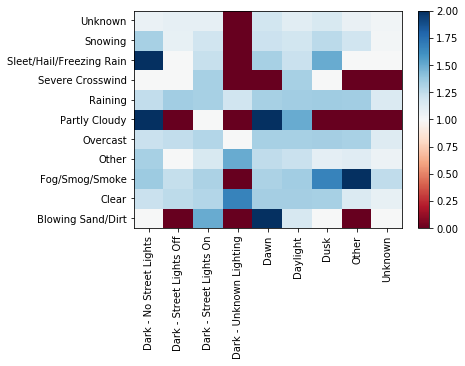

In [9]:
fig, ax = plt.subplots()
im = ax.pcolor(group1_pivot, cmap='RdBu')

#label names
row_labels = group1_pivot.columns.levels[1]
col_labels = group1_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group1_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group1_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [10]:
df_group2=df_collisions[['WEATHER','ADDRTYPE','SEVERITYCODE']]
group2=df_group2.groupby(['WEATHER','ADDRTYPE'],as_index=False).mean()
group2

group2_pivot=group2.pivot(index='WEATHER',columns='ADDRTYPE')
group2_pivot=group2_pivot.fillna(0)
group2_pivot

SEVERITYCODE                       
ADDRTYPE                        Alley     Block Intersection
WEATHER                                                     
Blowing Sand/Dirt            0.000000  1.179487     1.600000
Clear                        1.120370  1.259912     1.440790
Fog/Smog/Smoke               1.000000  1.263298     1.472826
Other                        1.000000  1.105263     1.345865
Overcast                     1.153061  1.257838     1.423592
Partly Cloudy                0.000000  1.500000     1.666667
Raining                      1.134831  1.277344     1.437800
Severe Crosswind             0.000000  1.300000     1.200000
Sleet/Hail/Freezing Rain     0.000000  1.183099     1.341463
Snowing                      1.000000  1.144330     1.320930
Unknown                      1.009346  1.037708     1.208306

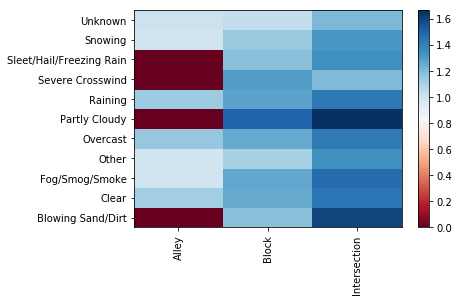

In [11]:
fig, ax = plt.subplots()
im = ax.pcolor(group2_pivot, cmap='RdBu')

#label names
row_labels = group2_pivot.columns.levels[1]
col_labels = group2_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group2_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group2_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [12]:
df_group3=df_collisions[['LIGHTCOND','ADDRTYPE','SEVERITYCODE']]
group3=df_group3.groupby(['LIGHTCOND','ADDRTYPE'],as_index=False).mean()
group3

group3_pivot=group3.pivot(index='LIGHTCOND',columns='ADDRTYPE')
group3_pivot=group3_pivot.fillna(0)
group3_pivot

SEVERITYCODE                       
ADDRTYPE                        Alley     Block Intersection
LIGHTCOND                                                   
Dark - No Street Lights      1.140000  1.170121     1.408805
Dark - Street Lights Off     1.000000  1.199262     1.429775
Dark - Street Lights On      1.097561  1.234819     1.427855
Dark - Unknown Lighting      0.000000  1.142857     1.750000
Dawn                         1.125000  1.250951     1.470718
Daylight                     1.130548  1.272966     1.437391
Dusk                         1.263158  1.262406     1.452741
Other                        1.000000  1.179894     1.486486
Unknown                      1.009804  1.029145     1.209171

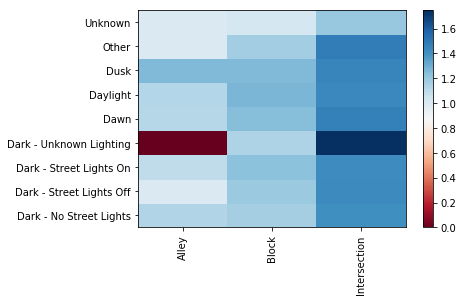

In [13]:
fig, ax = plt.subplots()
im = ax.pcolor(group3_pivot, cmap='RdBu')

#label names
row_labels = group3_pivot.columns.levels[1]
col_labels = group3_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group3_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group3_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [14]:
df_group4=df_collisions[['WEATHER','SPEEDING','SEVERITYCODE']]
group4=df_group4.groupby(['WEATHER','SPEEDING'],as_index=False).mean()
group4

group4_pivot=group4.pivot(index='WEATHER',columns='SPEEDING')
group4_pivot=group4_pivot.fillna(0)
group4_pivot

SEVERITYCODE          
SPEEDING                            N         Y
WEATHER                                        
Blowing Sand/Dirt            1.260870  1.333333
Clear                        1.319873  1.411635
Fog/Smog/Smoke               1.312621  1.520833
Other                        1.140078  1.315789
Overcast                     1.314091  1.353777
Partly Cloudy                1.600000  0.000000
Raining                      1.335397  1.359975
Severe Crosswind             1.250000  2.000000
Sleet/Hail/Freezing Rain     1.258427  1.173913
Snowing                      1.172996  1.237838
Unknown                      1.054923  1.244681

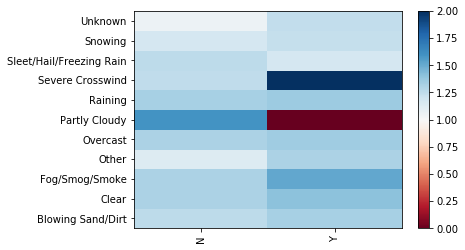

In [15]:
fig, ax = plt.subplots()
im = ax.pcolor(group4_pivot, cmap='RdBu')

#label names
row_labels = group4_pivot.columns.levels[1]
col_labels = group4_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group4_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group4_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [16]:
#weather and road conditions
df_group5=df_collisions[['WEATHER','ROADCOND','SEVERITYCODE']]
group5=df_group5.groupby(['WEATHER','ROADCOND'],as_index=False).mean()
group5

group5_pivot=group5.pivot(index='WEATHER',columns='ROADCOND')
group5_pivot=group5_pivot.fillna(0)
group5_pivot

SEVERITYCODE                                \
ROADCOND                          Dry       Ice       Oil     Other   
WEATHER                                                               
Blowing Sand/Dirt            1.250000  1.000000  0.000000  2.000000   
Clear                        1.324361  1.261006  1.631579  1.412698   
Fog/Smog/Smoke               1.340845  1.411765  0.000000  1.000000   
Other                        1.297753  1.263158  1.000000  1.285714   
Overcast                     1.318814  1.213333  1.375000  1.307692   
Partly Cloudy                1.500000  0.000000  0.000000  0.000000   
Raining                      1.320251  1.428571  1.272727  1.500000   
Severe Crosswind             1.300000  1.333333  0.000000  0.000000   
Sleet/Hail/Freezing Rain     1.400000  1.166667  0.000000  1.000000   
Snowing                      1.300000  1.137725  0.000000  2.000000   
Unknown                      1.151404  1.056338  1.000000  1.000000   

                                                                            \
ROADCOND                 Sand/Mud/Dirt Snow/Slush Standing Water   Unknown   
WEATHER                                                                      
Blowing Sand/Dirt             0.000000   1.200000       0.000000  1.000000   
Clear                         1.406250   1.234043       1.166667  1.116667   
Fog/Smog/Smoke                1.500000   1.000000       0.000000  1.285714   
Other                         1.000000   1.000000       0.000000  1.064453   
Overcast                      1.235294   1.136364       1.571429  1.144543   
Partly Cloudy                 0.000000   0.000000       0.000000  0.000000   
Raining                       1.272727   1.252747       1.272727  1.210526   
Severe Crosswind              0.000000   0.000000       0.000000  0.000000   
Sleet/Hail/Freezing Rain      0.000000   1.259259       1.000000  0.000000   
Snowing                       1.000000   1.163603       0.000000  1.125000   
Unknown                       1.125000   1.055556       1.000000  1.046023   

                                    
ROADCOND                       Wet  
WEATHER                             
Blowing Sand/Dirt         1.500000  
Clear                     1.328496  
Fog/Smog/Smoke            1.298137  
Other                     1.323077  
Overcast                  1.322340  
Partly Cloudy             2.000000  
Raining                   1.338751  
Severe Crosswind          1.250000  
Sleet/Hail/Freezing Rain  1.267857  
Snowing                   1.305195  
Unknown                   1.176887

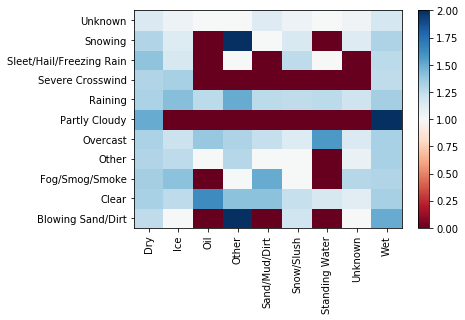

In [17]:
fig, ax = plt.subplots()
im = ax.pcolor(group5_pivot, cmap='RdBu')

#label names
row_labels = group5_pivot.columns.levels[1]
col_labels = group5_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group5_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group5_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [18]:
#road and light conditions
df_group6=df_collisions[['ROADCOND','LIGHTCOND','SEVERITYCODE']]
group6=df_group6.groupby(['ROADCOND','LIGHTCOND'],as_index=False).mean()
group6

group6_pivot=group6.pivot(index='ROADCOND',columns='LIGHTCOND')
group6_pivot=group6_pivot.fillna(0)
group6_pivot

SEVERITYCODE                           \
LIGHTCOND      Dark - No Street Lights Dark - Street Lights Off   
ROADCOND                                                          
Dry                           1.223916                 1.254111   
Ice                           1.260870                 1.142857   
Oil                           1.000000                 0.000000   
Other                         1.000000                 1.500000   
Sand/Mud/Dirt                 1.250000                 0.000000   
Snow/Slush                    1.166667                 1.200000   
Standing Water                1.500000                 0.000000   
Unknown                       1.088889                 1.058824   
Wet                           1.233209                 1.312785   

                                                                          \
LIGHTCOND      Dark - Street Lights On Dark - Unknown Lighting      Dawn   
ROADCOND                                                                   
Dry                           1.296932                     1.5  1.332805   
Ice                           1.201717                     0.0  1.306452   
Oil                           1.384615                     0.0  1.200000   
Other                         1.382353                     0.0  1.500000   
Sand/Mud/Dirt                 1.263158                     0.0  1.000000   
Snow/Slush                    1.195946                     0.0  1.076923   
Standing Water                1.285714                     0.0  1.666667   
Unknown                       1.076858                     1.0  1.145455   
Wet                           1.321659                     1.4  1.344860   

                                                        
LIGHTCOND       Daylight      Dusk     Other   Unknown  
ROADCOND                                                
Dry             1.337499  1.327074  1.137255  1.081851  
Ice             1.263352  1.210526  1.000000  1.030769  
Oil             1.447368  1.500000  0.000000  1.000000  
Other           1.380952  1.666667  1.000000  1.000000  
Sand/Mud/Dirt   1.384615  1.000000  0.000000  1.166667  
Snow/Slush      1.174927  1.190476  1.333333  1.046154  
Standing Water  1.212766  1.000000  1.666667  1.000000  
Unknown         1.098436  1.161850  1.052632  1.033931  
Wet             1.344761  1.359821  1.358696  1.143573

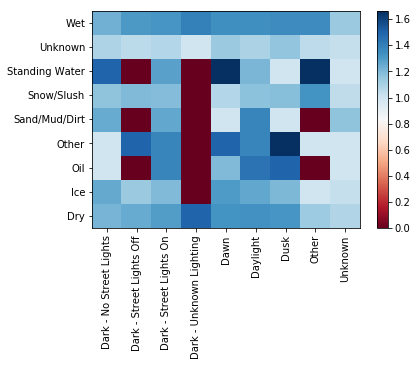

In [19]:
fig, ax = plt.subplots()
im = ax.pcolor(group6_pivot, cmap='RdBu')

#label names
row_labels = group6_pivot.columns.levels[1]
col_labels = group6_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group6_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group6_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [20]:
#road and address type
df_group7=df_collisions[['ROADCOND','ADDRTYPE','SEVERITYCODE']]
group7=df_group7.groupby(['ROADCOND','ADDRTYPE'],as_index=False).mean()
group7

group7_pivot=group7.pivot(index='ROADCOND',columns='ADDRTYPE')
group7_pivot=group7_pivot.fillna(0)
group7_pivot

SEVERITYCODE                       
ADDRTYPE              Alley     Block Intersection
ROADCOND                                          
Dry                1.125000  1.259250     1.439724
Ice                1.250000  1.205025     1.335052
Oil                0.000000  1.346154     1.500000
Other              0.000000  1.320000     1.416667
Sand/Mud/Dirt      1.000000  1.326923     1.384615
Snow/Slush         1.000000  1.126582     1.325000
Standing Water     0.000000  1.252747     1.300000
Unknown            1.018692  1.033833     1.206989
Wet                1.120301  1.272963     1.431925

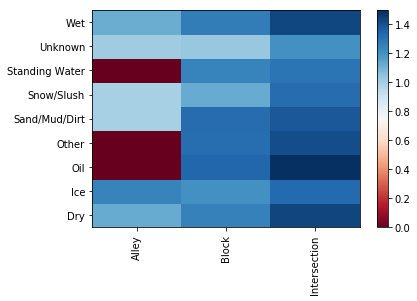

In [21]:
fig, ax = plt.subplots()
im = ax.pcolor(group7_pivot, cmap='RdBu')

#label names
row_labels = group7_pivot.columns.levels[1]
col_labels = group7_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group7_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group7_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [22]:
#road and speeding
df_group8=df_collisions[['ROADCOND','SPEEDING','SEVERITYCODE']]
group8=df_group8.groupby(['ROADCOND','SPEEDING'],as_index=False).mean()
group8

group8_pivot=group8.pivot(index='ROADCOND',columns='SPEEDING')
group8_pivot=group8_pivot.fillna(0)
group8_pivot

SEVERITYCODE          
SPEEDING                  N         Y
ROADCOND                             
Dry                1.318830  1.426054
Ice                1.207792  1.271676
Oil                1.360656  1.666667
Other              1.343434  1.320000
Sand/Mud/Dirt      1.262295  1.500000
Snow/Slush         1.153165  1.217822
Standing Water     1.263889  1.256410
Unknown            1.051231  1.222222
Wet                1.330463  1.352106

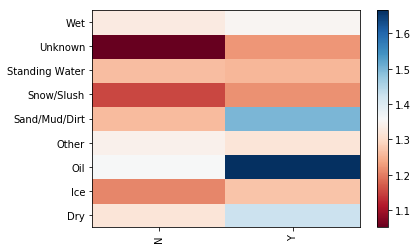

In [23]:
fig, ax = plt.subplots()
im = ax.pcolor(group8_pivot, cmap='RdBu')

#label names
row_labels = group8_pivot.columns.levels[1]
col_labels = group8_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group8_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group8_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [24]:
#light and speeding
df_group9=df_collisions[['LIGHTCOND','SPEEDING','SEVERITYCODE']]
group9=df_group9.groupby(['LIGHTCOND','SPEEDING'],as_index=False).mean()
group9

group9_pivot=group9.pivot(index='LIGHTCOND',columns='SPEEDING')
group9_pivot=group9_pivot.fillna(0)
group9_pivot

SEVERITYCODE          
SPEEDING                            N         Y
LIGHTCOND                                      
Dark - No Street Lights      1.210714  1.309524
Dark - Street Lights Off     1.260711  1.333333
Dark - Street Lights On      1.293912  1.354557
Dark - Unknown Lighting      1.363636  0.000000
Dawn                         1.327969  1.359375
Daylight                     1.329878  1.405719
Dusk                         1.328666  1.386029
Other                        1.207729  1.450000
Unknown                      1.045480  1.227273

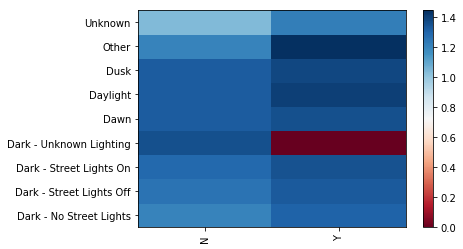

In [25]:
fig, ax = plt.subplots()
im = ax.pcolor(group9_pivot, cmap='RdBu')

#label names
row_labels = group9_pivot.columns.levels[1]
col_labels = group9_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group9_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group9_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [26]:
#address type and speeding
df_group10=df_collisions[['ADDRTYPE','SPEEDING','SEVERITYCODE']]
group10=df_group10.groupby(['ADDRTYPE','SPEEDING'],as_index=False).mean()
group10

group10_pivot=group10.pivot(index='ADDRTYPE',columns='SPEEDING')
group10_pivot=group10_pivot.fillna(0)
group10_pivot

SEVERITYCODE          
SPEEDING                N         Y
ADDRTYPE                           
Alley            1.105783  1.151515
Block            1.231053  1.359637
Intersection     1.430678  1.452272

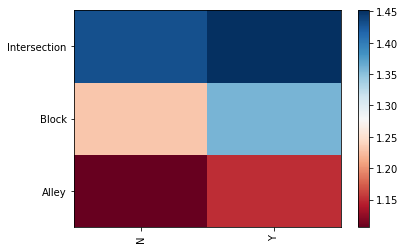

In [27]:
fig, ax = plt.subplots()
im = ax.pcolor(group10_pivot, cmap='RdBu')

#label names
row_labels = group10_pivot.columns.levels[1]
col_labels = group10_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group10_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group10_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [28]:
#Create df to analyze types
df_types=df_collisions[['ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR']]

for column in df_types.columns:
    print("\n"+column)
    print(df_types[column].value_counts())


ADDRTYPE
Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

SEVERITYDESC
Property Damage Only Collision    130642
Injury Collision                   56883
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
Parked Car    46679
Angles        34555
Rear Ended    33794
Other         23440
Sideswipe     18442
Left Turn     13659
Pedestrian     6589
Cycles         5399
Right Turn     2936
Head On        2011
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
2     109569
3      34988
4      14389
1      11582
5       6560
0       5505
6       2695
7       1126
8        533
9        214
10       127
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31     

In [29]:
df_collisiontype=df_collisions['COLLISIONTYPE'].value_counts()
df_collisiontype=pd.DataFrame(df_collisiontype)
df_collisiontype=df_collisiontype.reset_index()
df_collisiontype.columns=['COLLISIONTYPE','COUNT']
df_collisiontype

,COLLISIONTYPE,COUNT
0,Parked Car,46679
1,Angles,34555
2,Rear Ended,33794
3,Other,23440
4,Sideswipe,18442
5,Left Turn,13659
6,Pedestrian,6589
7,Cycles,5399
8,Right Turn,2936
9,Head On,2011


In [30]:
df_weather=df_collisions['WEATHER'].value_counts()
df_weather=pd.DataFrame(df_weather)
df_weather=df_weather.reset_index()
df_weather.columns=['WEATHER','COUNT']
df_weather

,WEATHER,COUNT
0,Clear,110499
1,Raining,32976
2,Overcast,27551
3,Unknown,14059
4,Snowing,896
5,Other,790
6,Fog/Smog/Smoke,563
7,Sleet/Hail/Freezing Rain,112
8,Blowing Sand/Dirt,49
9,Severe Crosswind,25


In [31]:
df_light=df_collisions['LIGHTCOND'].value_counts()
df_light=pd.DataFrame(df_light)
df_light=df_light.reset_index()
df_light.columns=['LIGHTCOND','COUNT']
df_light

,LIGHTCOND,COUNT
0,Daylight,115408
1,Dark - Street Lights On,48236
2,Unknown,12599
3,Dusk,5843
4,Dawn,2491
5,Dark - No Street Lights,1526
6,Dark - Street Lights Off,1184
7,Other,227
8,Dark - Unknown Lighting,11


In [32]:
df_addresstype=df_collisions['ADDRTYPE'].value_counts()
df_addresstype=pd.DataFrame(df_addresstype)
df_addresstype=df_addresstype.reset_index()
df_addresstype.columns=['ADDRTYPE','COUNT']
df_addresstype

,ADDRTYPE,COUNT
0,Block,123321
1,Intersection,63462
2,Alley,742


In [33]:
df_severity=df_collisions['SEVERITYDESC'].value_counts()
df_severity=pd.DataFrame(df_severity)
df_severity=df_severity.reset_index()
df_severity.columns=['SEVERITYDESC','COUNT']
df_severity

,SEVERITYDESC,COUNT
0,Property Damage Only Collision,130642
1,Injury Collision,56883


### Part 2

#### Determine the variable significance relative to accident severity

In [34]:
df_collisions['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df_collisions['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2],inplace=True)
df_collisions['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df_collisions['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df_collisions['SPEEDING'].replace(to_replace=['Y','N'], value=[0,1],inplace=True)

Feature=df_collisions[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','SPEEDING']]
Feature.head()

X = Feature
X[0:5]

,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,SPEEDING
0,4,8,5,2,1
1,6,8,2,1,1
2,4,0,5,1,1
3,1,0,5,1,1
4,6,8,5,2,1


In [35]:
y = df_collisions['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [36]:
df_collisions[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','SPEEDING','SEVERITYCODE']].corr()

,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,SPEEDING,SEVERITYCODE
WEATHER,1.000000,0.749436,0.201659,-0.086742,-0.039263,-0.105435
ROADCOND,0.749436,1.000000,0.019309,-0.028159,-0.089574,-0.045826
LIGHTCOND,0.201659,0.019309,1.000000,-0.047789,0.099826,-0.055782
ADDRTYPE,-0.086742,-0.028159,-0.047789,1.000000,0.060121,0.199785
SPEEDING,-0.039263,-0.089574,0.099826,0.060121,1.000000,-0.037269
SEVERITYCODE,-0.105435,-0.045826,-0.055782,0.199785,-0.037269,1.000000


In [37]:
pearson_coef, p_value = stats.pearsonr(df_collisions['WEATHER'], df_collisions['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

# Since the p-value is  < 0.001, the correlation is statistically significant, and the coefficient shows that the relationship is negative and moderate.

The Pearson Correlation Coefficient is -0.10543480075738064  with a P-value of P = 0.0


In [38]:
pearson_coef, p_value = stats.pearsonr(df_collisions['LIGHTCOND'], df_collisions['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

#Since the p-value is  <0.001, the correlation is statistically insignificant, and the linear relationship is only moderate.

The Pearson Correlation Coefficient is -0.0557815126664272  with a P-value of P = 4.1391354736468936e-129


In [39]:
pearson_coef, p_value = stats.pearsonr(df_collisions['ROADCOND'], df_collisions['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

# Since the p-value is  < 0.001, the correlation is statistically significant, and the coefficient shows that the relationship is negative and moderate.

The Pearson Correlation Coefficient is -0.045825741033401354  with a P-value of P = 1.0026296770403313e-87


In [40]:
pearson_coef, p_value = stats.pearsonr(df_collisions['ADDRTYPE'], df_collisions['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

#Since the p-value is  >0.001, the correlation is not statistically significant, but the linear relationship is very strong

The Pearson Correlation Coefficient is 0.19978545635906522  with a P-value of P = 0.0


In [41]:
pearson_coef, p_value = stats.pearsonr(df_collisions['SPEEDING'], df_collisions['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is -0.03726889416509689  with a P-value of P = 1.2418842081789513e-58


### Part 3

#### Evaluate model accuracy

In [42]:
# Normalize Data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.33715894,  1.48648276,  0.36200962,  1.38620406,  0.22799242],
       [ 1.04638501,  1.48648276, -1.4013662 , -0.69662849,  0.22799242],
       [ 0.33715894, -0.70681843,  0.36200962, -0.69662849,  0.22799242],
       [-0.72668016, -0.70681843,  0.36200962, -0.69662849,  0.22799242],
       [ 1.04638501,  1.48648276,  0.36200962,  1.38620406,  0.22799242]])

In [43]:
#K Nearest Neighbor (KNN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61159845, 0.68609519, 0.66876416, 0.6795094 , 0.65767231,
       0.68974803, 0.67969604, 0.68921477, 0.67268364, 0.67364351,
       0.67271031, 0.68969471, 0.68241568, 0.68745501])

In [44]:
k=2
neigh1=KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat=neigh1.predict(X_test)

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
f10=f1_score(y_test, yhat, average='weighted',labels=np.unique(yhat))
jac0=jaccard_similarity_score(y_test, yhat, sample_weight=None)
print("f1 score: ",f10,"\nJaccard Score: ",jac0)

The best accuracy was with 0.6897480335955206 with k= 6
f1 score:  0.6007208550477782 
Jaccard Score:  0.6860951873083588


In [45]:
# Decision Tree
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=4)
print("x: ",X_train1.shape,"y: ",y_train1.shape)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train1,y_train1)
predTree = Tree.predict(X_test1)

accuracy=metrics.accuracy_score(y_test1, predTree)
print("Decision Tree's Accuracy: ",accuracy)
f11=f1_score(y_test1, predTree, average='weighted',labels=np.unique(predTree))
jac1=jaccard_similarity_score(y_test1, predTree, sample_weight=None)
print("f1 score: ",f11,"\nJaccard Score: ",jac1)

x:  (131267, 5) y:  (131267,)
Decision Tree's Accuracy:  0.6979096306303103
f1 score:  0.8220810083646528 
Jaccard Score:  0.6979096306303103


In [46]:
# Support Vector Machine
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=4)
print("x: ",X_train2.shape,"y: ",y_train2.shape)

suppvm = svm.SVC(kernel='rbf',gamma='auto')
suppvm.fit(X_train2, y_train2) 
yhat2 = suppvm.predict(X_test2)
f12=f1_score(y_test2, yhat2, average='weighted',labels=np.unique(yhat2))
jac2=jaccard_similarity_score(y_test2, yhat2,sample_weight=None)
print("f1 score: ",f12,"\nJaccard Score: ",jac2)

x:  (150020, 5) y:  (150020,)
f1 score:  0.575528174970363 
Jaccard Score:  0.6971603786161845


In [47]:
cnf_matrix = confusion_matrix(y_test2, yhat2)
np.set_printoptions(precision=2)

print (classification_report(y_test2, yhat2))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     26135
           2       0.55      0.01      0.01     11370

   micro avg       0.70      0.70      0.70     37505
   macro avg       0.63      0.50      0.42     37505
weighted avg       0.65      0.70      0.58     37505



In [48]:
# Logistic Regression
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, y, test_size=0.2, random_state=4)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train3,y_train3)
yhat3=LR.predict(X_test3)
yhat3_prob=LR.predict_proba(X_test3)

f13=f1_score(y_test3, yhat3, average='weighted',labels=np.unique(yhat3))
jac3=jaccard_similarity_score(y_test3, yhat3, sample_weight=None)
log3=log_loss(y_test3, yhat3_prob)

print("f1 score: ",f13,"\nJaccard Score: ",jac3,"\nLogLoss: ",log3)

f1 score:  0.5852839264299331 
Jaccard Score:  0.696413811491801 
LogLoss:  0.5855495621779528


#### Thank you for reviewing my project!